<div class="alert alert-block alert-info">

<h1 style="font-family:verdana;"> Description:</h1> 

<ul>
<li><p style="font-family:verdana;">
In this notebook, we are going to predict whether a person's income is above 50k or below 50k using various features like age, education, and occupation.
</p></li>
    
<li><p style="font-family:verdana;">
The dataset we are going to use is the Adult census income dataset from Kaggle which contains about 32561 rows and 15 features that can be downloaded <a href="https://www.kaggle.com/uciml/adult-census-income">here</a>.
</p></li> 

<li><p style="font-family:verdana;">
The dataset contains the labels which we have to predict and the labels are discrete and binary. So the problem we have is a Supervised Classification type.
</p></li>  
</ul>

</div>

## Step 0: Load libraries and dataset

In [ ]:
# %%capture
# !pip install patool

In [ ]:
# import patoolib

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing dataset
folderpath = "/content/drive/MyDrive/AI Engineer/AI Specialist/3. Datasets"
filepath = "AI Specialist Lesson 09.zip"
os.chdir(folderpath)
# patoolib.extract_archive(filepath)
os.chdir(folderpath + "/AI Specialist Lesson 09")
# os.chdir("BigMartSales Prediction")
os.listdir()

['adult(EDA only).csv',
 'adult.csv',
 'Customer Data.csv',
 'heatmap.png',
 'multi1.png',
 '__pycache__',
 'IncomePredictionModule.py',
 'final_data.csv',
 'bi3.png',
 'bi2.png',
 'multi2.png',
 'income_pre.pkl']

In [4]:
# read file
dataset = pd.read_csv('adult.csv')
display(dataset.head().T)

,0,1,2,3,4
age,90,82,66,54,41
workclass,?,Private,?,Private,Private
fnlwgt,77053,132870,186061,140359,264663
education,HS-grad,HS-grad,Some-college,7th-8th,Some-college
education.num,9,9,10,4,10
marital.status,Widowed,Widowed,Widowed,Divorced,Separated
occupation,?,Exec-managerial,?,Machine-op-inspct,Prof-specialty
relationship,Not-in-family,Not-in-family,Unmarried,Unmarried,Own-child
race,White,White,Black,White,White
sex,Female,Female,Female,Female,Female


## Step 1. Problem Understanding : 

In [5]:
# Step 1. Problem Understanding : 
# Feature ? Target ? Classification or Regression 

# Feature : 14
#  - age	            : age of a citizen
#  - workclass	      : workclass of a citizen
#  - fnlwgt	          : final weight of a citizen
#  - education	      : education degree of a citizen 
#  - education.num	  : number of years for education of a citizen
#  - marital.status	  : status of marriage 
#  - occupation	      : occupation of a citizen
#  - relationship	    : relationship or role in family 
#  - race	            : race of citizen
#  - sex	            : gender of a citizen
#  - capital.gain	    : Short-term gains come from the income you have owned for one year or less.
#  - capital.loss	    : Short-term gains come from the income you have lost for one year or less.
#  - hours.per.week	  : working hours in a week
#  - native.country   : Original Country 

#  Target : 
#   - income : <=50k or >50k
#  Type of Problem : Classification
#  Business Value : Understand the standard of living of a region

## Step 2.  Data Understanding : 

In [6]:
# Step 2.  Data Understanding : 
# - Missing Values ?
# - Outlier(Noise) ? 
# - Inconsistent ?
# - Imbalanced ?
# - Skewness ?



# Missing Values ? Khong co missing theo so luong dong 
# Kiem tra cac cot loai bang unique xem coi co gia tri bat hop ly hay khong
# tuy nhien co cac cot co gia tri bat hop ly : capital.gain (min = 0), capital.loss (min = 0), 
# workclass (value = "?"), occupation (value = "?"), native.country (value = "?")

# Outlier(Noise) ? Nhin co ban la khong co outlier lon tuy nhien nen Visualization de xac dinh xem co outlier nho hay khong 
# Inconsistent ? Nhin co ban la khong co du lieu khong thong nhat tuy nhien can xuat unique hoac value_counts de kiem tra lai
# Imbalanced ? Du lieu mat can bang target voi 75% thuoc nhom income < 50k con 25% thi >50k

# abs(mean - median)/std < 0.2 : is OK else is skew

# Skewness ? capital.gain, capital.loss have a skewness problem

In [7]:
# Statistical summary
dataset.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
dataset.describe(include = 'O')

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [9]:
# check Imbalanced:
for col in dataset.describe(include = 'O').columns:
  print(f"Checking: {col} \n")
  display(dataset[col].value_counts())
  print('+ + '*10,'\n')

Checking: workclass 



Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

+ + + + + + + + + + + + + + + + + + + +  

Checking: education 



HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

+ + + + + + + + + + + + + + + + + + + +  

Checking: marital.status 



Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

+ + + + + + + + + + + + + + + + + + + +  

Checking: occupation 



Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

+ + + + + + + + + + + + + + + + + + + +  

Checking: relationship 



Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

+ + + + + + + + + + + + + + + + + + + +  

Checking: race 



White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

+ + + + + + + + + + + + + + + + + + + +  

Checking: sex 



Male      21790
Female    10771
Name: sex, dtype: int64

+ + + + + + + + + + + + + + + + + + + +  

Checking: native.country 



United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

+ + + + + + + + + + + + + + + + + + + +  

Checking: income 



<=50K    24720
>50K      7841
Name: income, dtype: int64

+ + + + + + + + + + + + + + + + + + + +  



In [10]:
# Check how many '?' % in dataset
c = dataset.isin(['?']).sum()
round(( c/ dataset.shape[0])* 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [11]:
# Checking Imbalanced:
income = dataset['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

<=50K    75.92 %
>50K     24.08 %
Name: income, dtype: object

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
    
<li><p style="font-family:verdana;">
The dataset doesn't have any null values, but it contains missing values in the form of '?' which needs to be preprocessed.
</p></li>    

<li><p style="font-family:verdana;">
The dataset is unbalanced, as the dependent feature 'income' contains 75.92% values have income less than 50k and 24.08% values have income more than 50k.
</p></li>    

</ul>

</div>

## Step 3. Feature Understanding :  

In [ ]:
# Step 3. Feature Understanding :  
# EDA with Visualization on Univariate, BiVariate and MultiVariate Analysis

### 2.1: Univariate Analysis

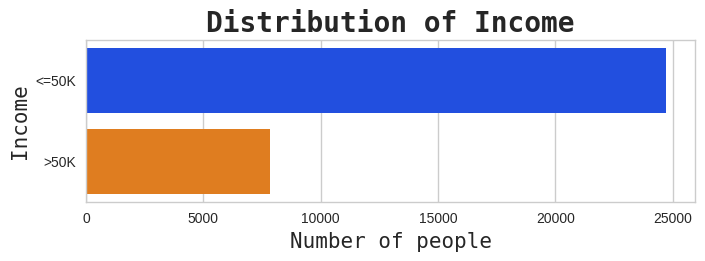

In [ ]:
# Creating a barplot for 'Income'
income = dataset['income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 2))
sns.barplot(income.values, income.index, palette='bright')

plt.title('Distribution of Income', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

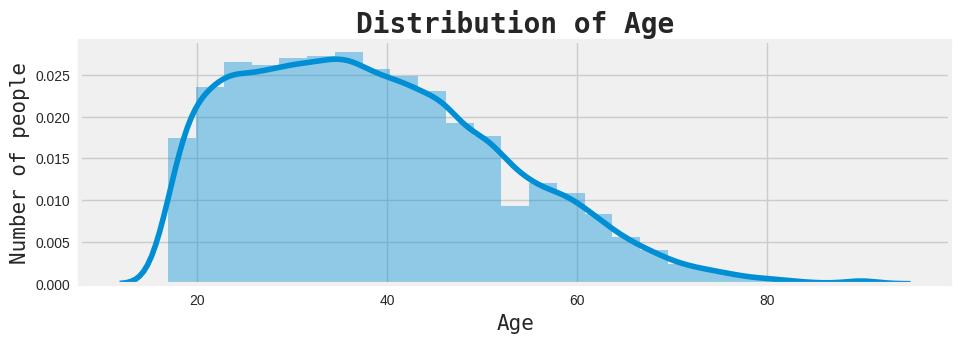

In [ ]:
# Creating a distribution plot for 'Age'
age = dataset['age'].value_counts()

plt.figure(figsize=(10, 3))
plt.style.use('fivethirtyeight')
sns.distplot(dataset['age'], bins=25)

plt.title('Distribution of Age', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

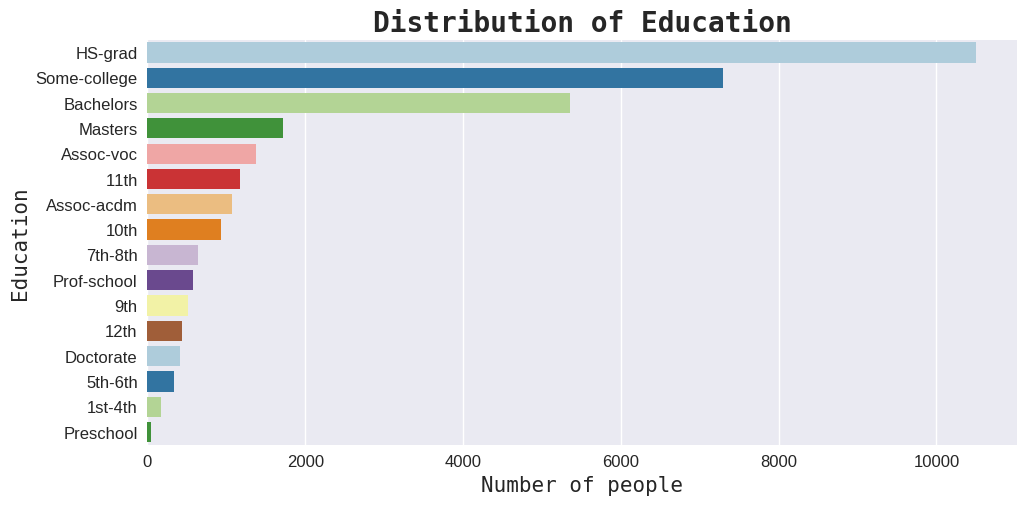

In [ ]:
# Creating a barplot for 'Education'
edu = dataset['education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='Paired')

plt.title('Distribution of Education', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

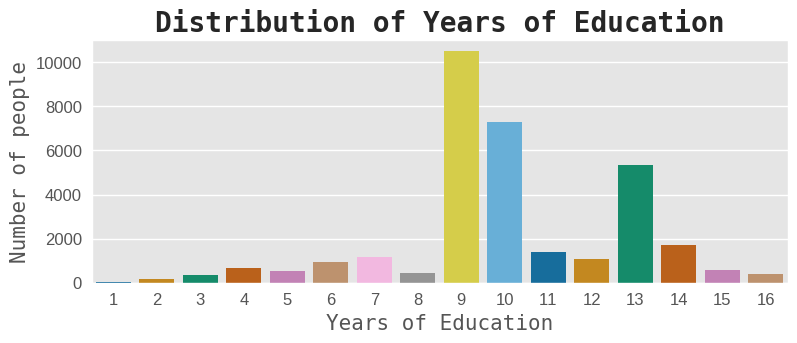

In [ ]:
# Creating a barplot for 'Years of Education'
edu_num = dataset['education.num'].value_counts()

plt.style.use('ggplot')

plt.figure(figsize=(8, 3))
sns.barplot( edu_num.index, edu_num.values,  palette='colorblind')

plt.title('Distribution of Years of Education', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

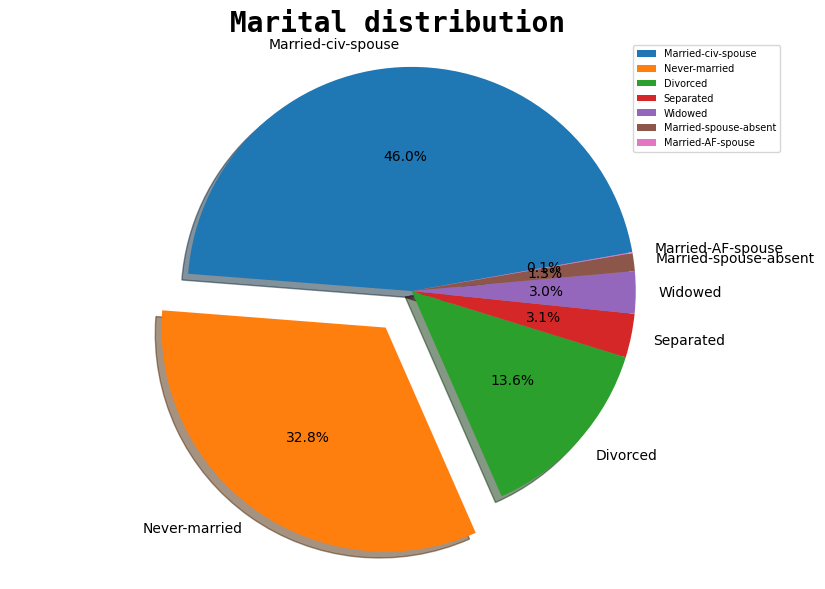

In [ ]:
# Creating a pie chart for 'Marital status'
marital = dataset['marital.status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

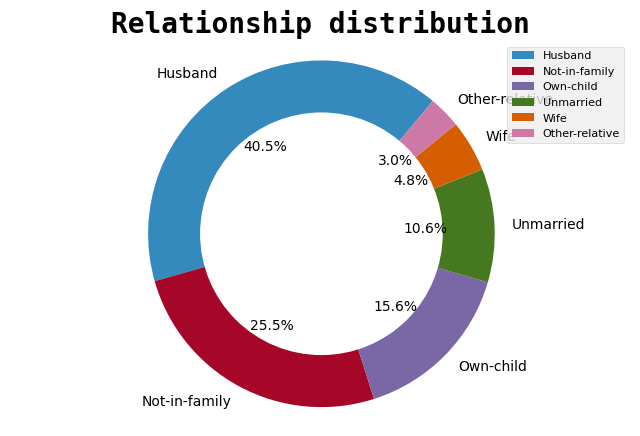

In [ ]:
# Creating a donut chart for 'Age'
relation = dataset['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(8, 5))
plt.pie(relation.values, labels=relation.index,startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 8})
plt.show()

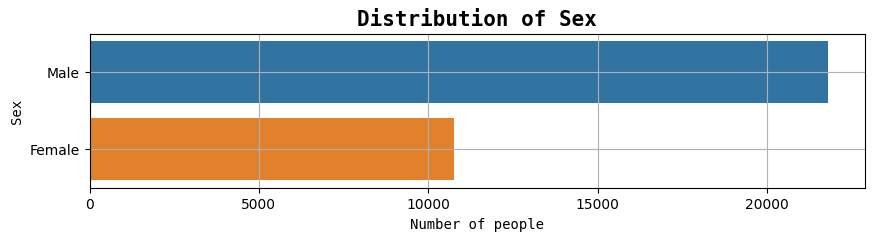

In [ ]:
# Creating a barplot for 'Sex'
sex = dataset['sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 2))
sns.barplot(sex.values, sex.index)

plt.title('Distribution of Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 10})
plt.ylabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 10})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


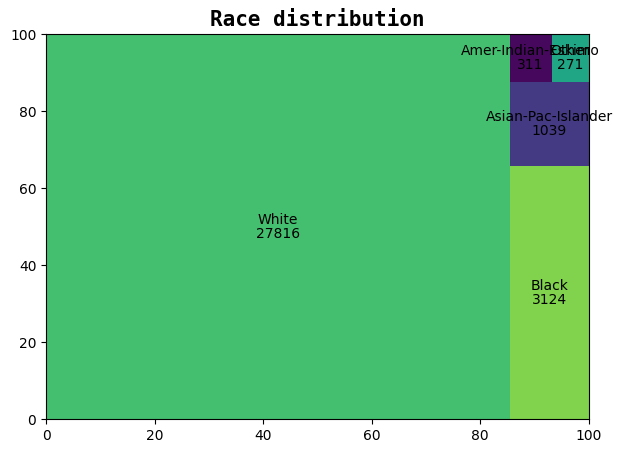

In [ ]:
# Creating a Treemap for 'Race'
import squarify
race = dataset['race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
squarify.plot(sizes=race.values, label=race.index, value=race.values)
plt.title('Race distribution', fontdict={'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.show()

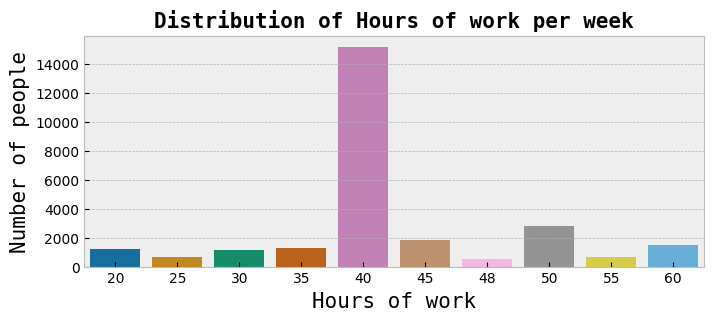

In [ ]:
# Creating a barplot for 'Hours per week'
hours = dataset['hours.per.week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(8, 3))
sns.barplot(hours.index, hours.values, palette='colorblind')

plt.title('Distribution of Hours of work per week', fontdict={'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

### 2.2 Bivariate Analysis

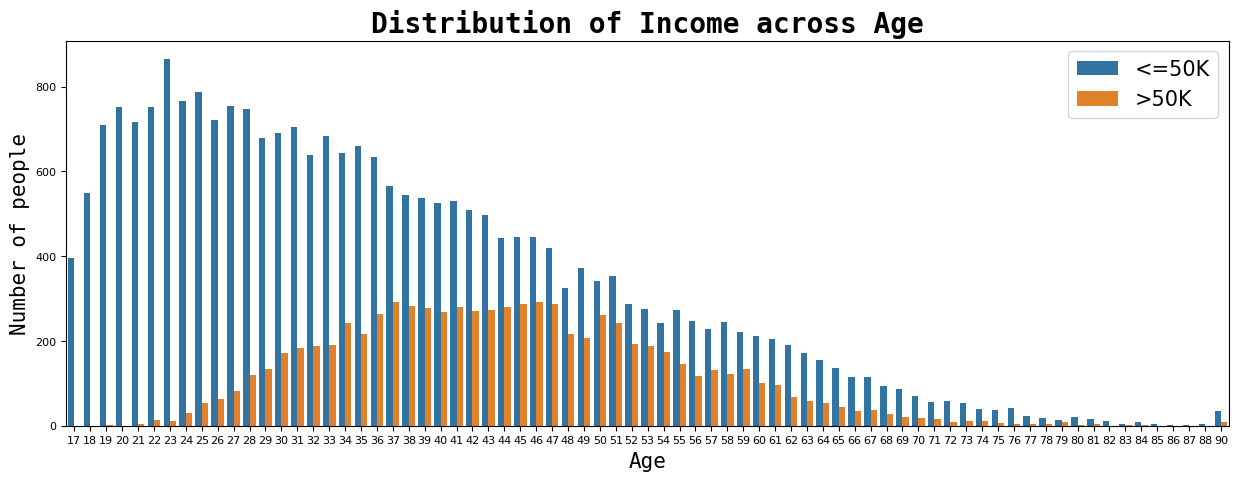

In [ ]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(15, 5))
sns.countplot(dataset['age'], hue=dataset['income'])

plt.title('Distribution of Income across Age', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=8)
plt.legend(loc=1, prop={'size': 15})
plt.show()

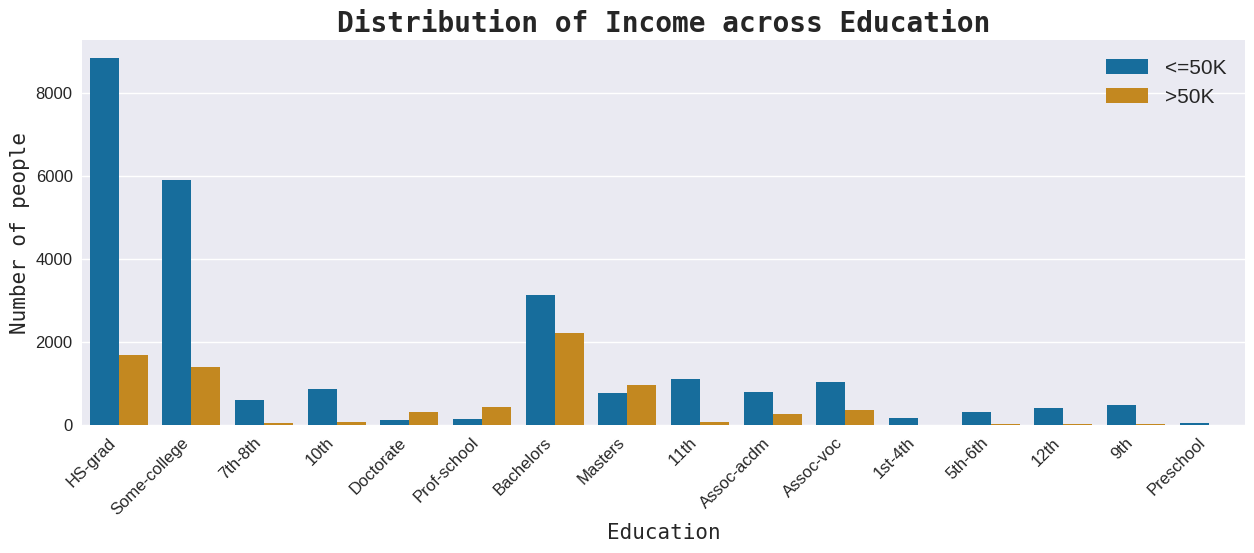

In [ ]:
# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(15, 5))
sns.countplot(dataset['education'], hue=dataset['income'], palette='colorblind')

plt.title('Distribution of Income across Education',fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education',fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people',fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(loc=1, prop={'size': 15})
plt.show()

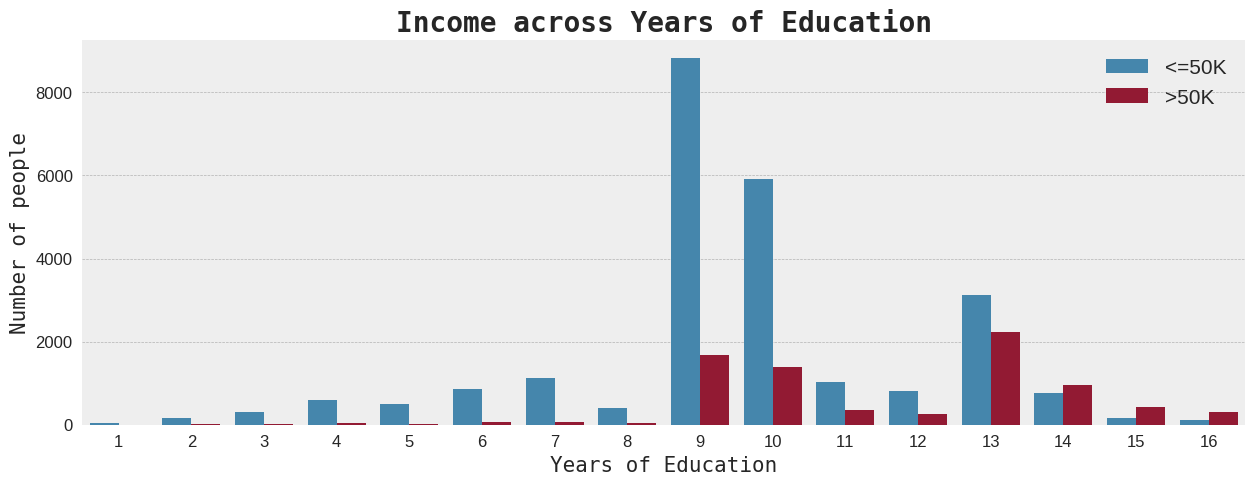

In [ ]:
# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(15, 5))
sns.countplot(dataset['education.num'],hue=dataset['income'])

plt.title('Income across Years of Education', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people',  fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()

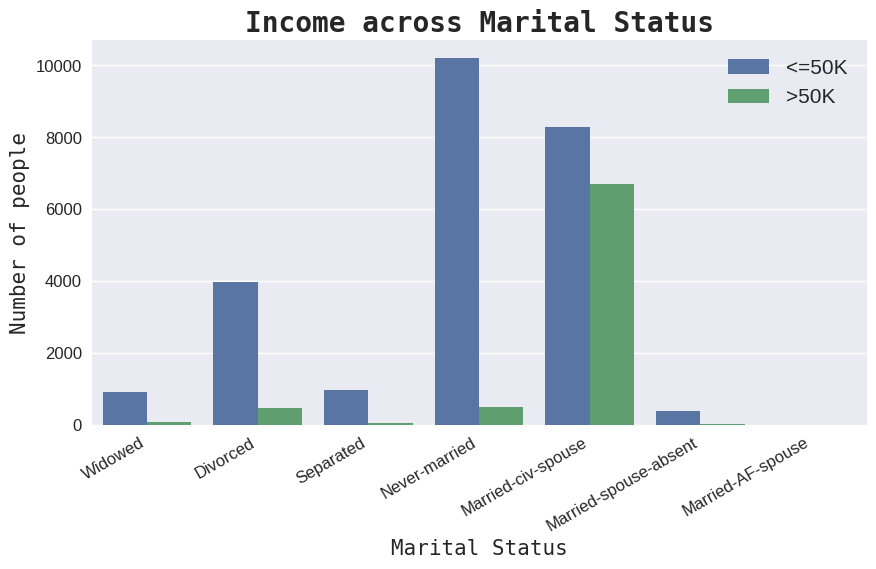

In [ ]:
# Creating a countplot of income across Marital Status
plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.countplot(dataset['marital.status'], hue=dataset['income'])

plt.title('Income across Marital Status', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.xticks(rotation=30, ha='right')
plt.show()

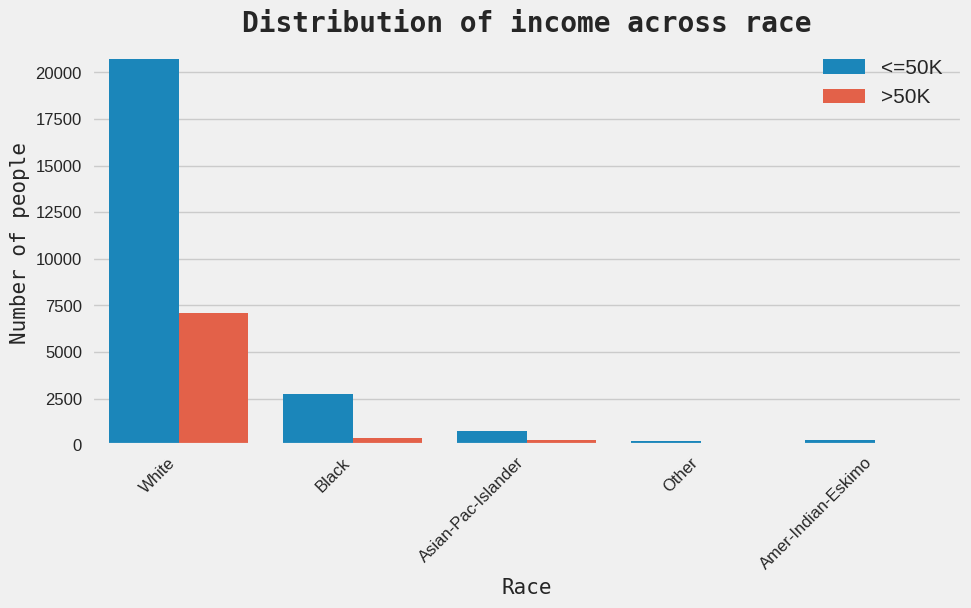

In [ ]:
# Creating a countplot of income across race
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 5))
sns.countplot(dataset['race'], hue=dataset['income'])

plt.title('Distribution of income across race', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.xticks(rotation=45, ha='right')
plt.show()

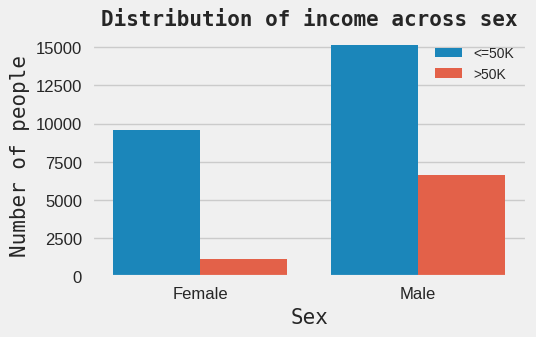

In [ ]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(5, 3))
sns.countplot(dataset['sex'], hue=dataset['income'])

plt.title('Distribution of income across sex', fontdict={'fontname': 'Monospace', 'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

### 2.3 Multivariate Analysis

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
dataset['income'] = le.fit_transform(dataset['income'])

In [ ]:
dataset['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [ ]:
# Creating a pairplot of dataset
# sns.pairplot(dataset)
# plt.savefig('multi1.png')
# plt.show()

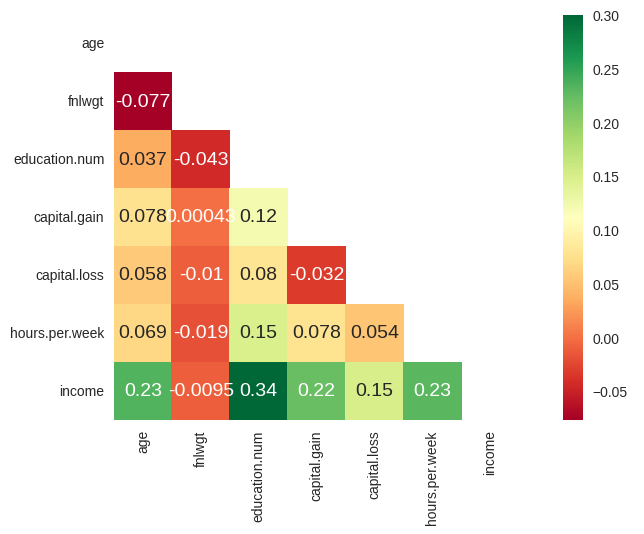

In [ ]:
corr = dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()

## Model, training

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
        
<li><p style="font-family:verdana;">
In this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.
</p></li>    

<li><p style="font-family:verdana;">
From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.
</p></li>    

</ul>

</div>

## Step 4. Feature Engineering : 

In [ ]:
# Step 4. Feature Engineering : 
# Skewness/Inconsistent/Missing/Outlier Handling, 
# Feature Enrichment, Feature Transformation, Feature Selection, Feature Encoding, 
# Feature Scaling (Normalization & Standardization)

### Missing Data 

In [12]:
# Missing Data 
# Checking null values
dataset = dataset.replace('?', np.nan)
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [13]:
# replace '?' --> mode:
columns_with_nan = ['workclass', 'occupation', 'native.country']
for col in columns_with_nan:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

In [14]:
# Checking null values
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [15]:
# remove col contain values 0:
print(dataset.shape)
print(dataset[dataset["capital.gain"] == 0].shape)	
print(dataset[dataset["capital.loss"] == 0].shape)	

dataset = dataset.drop(["capital.gain", "capital.loss"], axis = 1)
print(dataset.shape)

(32561, 15)
(29849, 15)
(31042, 15)


In [18]:
# check skewness:
dataset.skew()

age               0.558743
fnlwgt            1.446980
education.num    -0.311676
hours.per.week    0.227643
dtype: float64

### Feature Encoding 

In [ ]:
dataset.describe(include='O')

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,24532,10501,14976,5983,13193,27816,21790,29753


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoderSeries = {} #store encoder for invert
for col in dataset.columns:
    if dataset[col].dtypes == 'object':
        encoder = LabelEncoder()
        dataset[col] = encoder.fit_transform(dataset[col])
        encoderSeries[col] = encoder

Harry: encode object to number --> store value in dic to decode.

In [ ]:
# dic contain encode for inver: 
# key is col, and value is encode value
for key, value in encoderSeries.items() :
    print(key)

workclass
education
marital.status
occupation
relationship
race
sex
native.country


In [ ]:
# show target labels
encoderSeries['marital.status'].classes_

array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
      dtype=object)

In [ ]:
# inverse encode to label
encoderSeries['marital.status'].inverse_transform([0,1,2,3])

array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent'], dtype=object)

In [ ]:
# transform label to encode
encoderSeries['marital.status'].transform(['Divorced', 'Married-AF-spouse'])

array([0, 1])

In [ ]:
dataset.dtypes

age               int64
workclass         int64
fnlwgt            int64
education         int64
education.num     int64
marital.status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
hours.per.week    int64
native.country    int64
income            int64
dtype: object

In [ ]:
dataset.head().T

,0,1,2,3,4
age,90,82,66,54,41
workclass,3,3,3,3,3
fnlwgt,77053,132870,186061,140359,264663
education,11,11,15,5,15
education.num,9,9,10,4,10
marital.status,6,6,6,0,5
occupation,9,3,9,6,9
relationship,1,1,4,4,3
race,4,4,2,4,4
sex,0,0,0,0,0


### Feature Selection

In [ ]:
# Feature Selection
X = dataset.drop('income', axis=1)
Y = dataset['income']

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)
selector.fit(X, Y)

In [ ]:
feature_imp = selector.feature_importances_

In [ ]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

# greater values are more important

0 18.28
1 4.66
2 20.43
3 4.19
4 9.47
5 8.11
6 8.39
7 9.14
8 1.66
9 2.91
10 11.05
11 1.71


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  hours.per.week  32561 non-null  int64
 11  native.country  32561 non-null  int64
dtypes: int64(12)
memory usage: 3.0 MB


In [ ]:
X = X.drop(['workclass', 'education', 'race', 'sex', 'native.country'], axis=1)

Harry: save clearned data for deploy to prediction app

In [ ]:
# final_data = dataset.drop(['workclass', 'education', 'race', 'sex', 'native.country', 'income'], axis=1)

In [ ]:
# final_data.to_csv('final_data.csv')

In [ ]:
# Feature : 14
#  - age	            : age of a citizen
#  - workclass	      : workclass of a citizen
#  - fnlwgt	          : final weight of a citizen
#  - education	      : education degree of a citizen 
#  - education.num	  : number of years for education of a citizen
#  - marital.status	  : status of marriage 
#  - occupation	      : occupation of a citizen
#  - relationship	    : relationship or role in family 
#  - race	            : race of citizen
#  - sex	            : gender of a citizen
#  - capital.gain	    : Short-term gains come from the income you have owned for one year or less.
#  - capital.loss	    : Short-term gains come from the income you have lost for one year or less.
#  - hours.per.week	  : working hours in a week
#  - native.country   : Original Country 

#  Target : 
#   - income : <=50k or >50k
#  Type of Problem : Classification
#  Business Value : Understand the standard of living of a region

### Feature Scaling

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

# save mean and std value for prediction app

In [ ]:
X.head()

,age,fnlwgt,education.num,marital.status,occupation,relationship,hours.per.week
0,3.769612,-1.067997,-0.420060,2.249480,0.720237,-0.277805,-0.035429
1,3.183112,-0.539169,-0.420060,2.249480,-0.790092,-0.277805,-1.817204
2,2.010110,-0.035220,-0.031360,2.249480,0.720237,1.589322,-0.035429
3,1.130359,-0.468215,-2.363558,-1.734058,-0.034928,1.589322,-0.035429
4,0.177296,0.709482,-0.031360,1.585557,0.720237,0.966947,-0.035429


Harry: StandardScaler chuẩn hóa data: z = (x-u)/s trong đó x,u,s lần lượt là giá trị cần chuẩn hóa, u là mean của data chuẩn hóa, s là std của data chuẩn hóa.



```
# This is formatted as code
scaler.mean_ # --> u
scaler.scale_ # --> s
```

Vậy: dữ liệu mới vào: thì match với endcode --> đưa vào chuẩn hóa thì x mới = (x-u)/s với các thông số ở bên trên


## Step 5. Dataset Partition : 

In [ ]:
# Step 5. Dataset Partition : 
# Imblanced Handling

In [ ]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: income, dtype: object

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

ros.fit(X, Y)
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [ ]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: income, dtype: object

In [ ]:
# Train Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=72)

In [ ]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39552, 7)
Y_train shape: (39552,)
X_test shape: (9888, 7)
Y_test shape: (9888,)


In [ ]:
X_train.head()

,age,fnlwgt,education.num,marital.status,occupation,relationship,hours.per.week
35832,0.177296,-0.729669,1.912138,-0.406212,0.720237,2.211698,-0.035429
25461,1.570235,-0.630615,-0.031360,-0.406212,0.216794,-0.900181,-0.035429
26358,-0.555830,-0.156320,1.134739,-0.406212,1.475401,-0.900181,-0.035429
19443,0.030671,-0.016489,-0.031360,-1.734058,-0.286649,-0.277805,-0.035429
4400,0.617171,-0.652207,-0.031360,-0.406212,1.475401,-0.900181,0.369519


In [ ]:
X_test.head()

,age,fnlwgt,education.num,marital.status,occupation,relationship,hours.per.week
47113,-0.482518,0.159459,1.134739,-0.406212,-0.790092,-0.900181,1.584366
4116,0.177296,-0.277706,1.523438,-1.734058,0.720237,1.589322,-0.035429
45624,0.250608,-0.185208,1.134739,-1.734058,-0.790092,-0.277805,1.179417
27237,-0.189267,0.750970,-0.420060,-0.406212,-0.034928,-0.900181,-0.035429
39708,0.323921,2.251135,1.523438,0.921634,0.720237,-0.277805,0.774468


In [ ]:
X_test[:2]

,age,fnlwgt,education.num,marital.status,occupation,relationship,hours.per.week
47113,-0.482518,0.159459,1.134739,-0.406212,-0.790092,-0.900181,1.584366
4116,0.177296,-0.277706,1.523438,-1.734058,0.720237,1.589322,-0.035429


Try apply parameter after tuning to ML

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
ran_for = RandomForestClassifier(random_state=72, max_depth=71, n_estimators=142)

In [ ]:
ran_for.fit(X_train, Y_train)

RandomForestClassifier(max_depth=71, n_estimators=142, random_state=72)

In [ ]:
Y_pred_ran_for = ran_for.predict(X_test)

In [ ]:
type(Y_pred_ran_for)

numpy.ndarray

In [ ]:
type(Y_test)

pandas.core.series.Series

In [ ]:
Y_pred_ran_for

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
Y_test

47113    1
4116     0
45624    1
27237    0
39708    1
        ..
35843    1
20374    1
36781    1
41089    1
31401    0
Name: income, Length: 9888, dtype: int64

In [ ]:
f1_score(Y_test, Y_pred_ran_for )*100

92.53415431979988

In [ ]:
ran_for.predict(X_test[1:2])

array([0])

In [ ]:
input_ = [[0.54385864 ,
           1.48668002 ,
           0.35733957 ,
          -0.03542945,
            2.24948009 ,
           0.72023651,
           -0.27780504]]

ran_for.predict(input_)

array([0])

In [ ]:
import pickle
pickle.dump(ran_for, open('income_pre.pkl','wb'))

## Step 6. Data Modelling : 

In [ ]:
# Step 6. Data Modelling : 
# Try many ML methods

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [ ]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [ ]:
Y_pred_log_reg = log_reg.predict(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
Y_pred_knn = knn.predict(X_test)

In [ ]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [ ]:
svc.fit(X_train, Y_train)

SVC(random_state=42)

In [ ]:
Y_pred_svc = svc.predict(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:
nb.fit(X_train, Y_train)

GaussianNB()

In [ ]:
Y_pred_nb = nb.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)

In [ ]:
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
Y_pred_dec_tree = dec_tree.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)

In [ ]:
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
Y_pred_ran_for = ran_for.predict(X_test)

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train, Y_train)

XGBClassifier()

In [ ]:
Y_pred_xgb = xgb.predict(X_test)

## Step 7. Data Evaluation : 

In [ ]:
# Step 7. Data Evaluation : 
# Display Metrics for Classification (Accuracy, Precision, Recall), 
# Display Metrics for Regression (R2Score, MSE, RMSE)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 74.49
F1 score: 74.67


In [ ]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 82.69
F1 score: 83.75


In [ ]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 80.92
F1 score: 81.85


In [ ]:
print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_nb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_nb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 78.03
F1 score: 78.5


In [ ]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 90.67
F1 score: 91.16


In [ ]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.27
F1 score: 92.65


In [ ]:
print('XGB Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_xgb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_xgb) * 100, 2))

XGB Classifier:
Accuracy score: 81.82
F1 score: 82.46


## Step 8. Hyper-parameter Tuning : 

In [ ]:
# Step 8. Hyper-parameter Tuning : 
# Tuning parameters: Cross Validation (CV), GridSearchCV, Regularization (L1, L2 penalty)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [ ]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [ ]:
rf_tuned = RandomForestClassifier(random_state=72)

In [ ]:
rf_cv = RandomizedSearchCV(estimator=rf_tuned, 
                           param_distributions=param_dist, 
                           cv=5, 
                           random_state=72)

In [ ]:
rf_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=72),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=72)

In [ ]:
rf_cv.best_score_

0.8973756396420928

In [ ]:
rf_cv.best_params_

{'n_estimators': 142, 'max_depth': 71}

In [ ]:
#Choosing the best random state using Logistic regression
def randomstate(a,b):
    maxx=0
    for state in range(1,201):
        xtrain, xtest, ytrain, ytest = train_test_split(a,b,test_size=0.2,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        r2=r2_score(p,ytest)
        if maxx<r2:
            maxx=r2
            j=state
    return j

## Step 9. Build the pipeline

In [ ]:
# Step 9. Build the pipeline with the best Model with the best parameters
# Choose best hyper-parameters and build best models

In [ ]:
#Choosing the best random state using Logistic regression

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

def randomstate(a,b):
    maxx=0
    for state in range(1,201):
        xtrain, xtest, ytrain, ytest = train_test_split(a,b,test_size=0.2,random_state=state)
        model=RandomForestClassifier()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        r2=f1_score(p,ytest)
        if maxx<r2:
            maxx=r2
            j=state
    return j

randomstate(X_resampled, Y_resampled)

72

In [ ]:
%%writefile IncomePredictionModule.py
# import all library you need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline 


def ConstructModel(X, y):
  ran_for = RandomForestClassifier(random_state=72, max_depth=71, n_estimators=142)
  ran_for = Pipeline([('RandomForestClassifier', ran_for)])
  ran_for.fit(X,y)
  return ran_for


def Prediction(X_new, ran_for):
  Y_pred_ran_for = ran_for.predict(X_new)
  return Y_pred_ran_for


def ReportAccuracy(y, y_predict, display = 1):
  Accuracy_score = round(accuracy_score(y, y_predict) * 100, 2)
  score = f1_score(y, y_predict)
  score = round(score * 100, 2)
  if display:
    print('Random Forest Classifier:')
    print('Accuracy score:', Accuracy_score)
    print('F1 score:',score)
  return {"Accuracy score" : Accuracy_score, "F1 score:" : score} 

# options
def Visualization():
  pass

def LogReport(X, y, y_predict):
  pass

Overwriting IncomePredictionModule.py


In [ ]:
import IncomePredictionModule as IPM

In [ ]:
# Train Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=72)
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39552, 7)
Y_train shape: (39552,)
X_test shape: (9888, 7)
Y_test shape: (9888,)


In [ ]:
ran_for = IPM.ConstructModel(X_train, Y_train)

In [ ]:
Y_pred_ran_for = IPM.Prediction(X_test, ran_for)

In [ ]:
# reportAcc = IPM.ReportAccuracy(Y_test, Y_pred_ran_for, display = 0)

In [ ]:
def ReportAccuracy1(y, y_predict, display = 1):
  Accuracy_score = round(accuracy_score(y, y_predict) * 100, 2)
  F1_score = round(f1_score(y, y_predict) * 100, 2)
  if display:
    print('Random Forest Classifier:')
    print('Accuracy score:', Accuracy_score)
    print('F1 score:',F1_score)
  return {"Accuracy score" : Accuracy_score, "F1 score:" : F1_score} 

In [ ]:
ReportAccuracy1(Y_test, Y_pred_ran_for, display = 0)

{'Accuracy score': 92.15, 'F1 score:': 92.53}

[link text](https://)<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Conclusion:</h3>

<ul>
    
<li><p style="font-family:verdana;">
In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier and xgboost classifier.
</p></li>    

<li><p style="font-family:verdana;">
A hyperparameter tuned random forest classifier gives the highest accuracy score of 92.77 and f1 score of 93.08.
</p></li>    

</ul>

</div>